In [ ]:
#installing gensim module

In [2]:
!pip install gensim 

In [3]:
#NLP-TM Assgnmnt (question -2)
#for easy to code i converted paragraph into a dataframe and done text modeling and text summarization.

In [4]:
#imported pandas,mataplotlib ,gensim,nltk modules

In [5]:
import pandas as pd

In [6]:
import pandas as pd
df = pd.read_csv('E:/360DigiZip/NLPTMAassgnmnt/NLP-TM.txt', delimiter='\t', header=None, names=["text"])
df

,text
0,"In an article in Cell, National Institutes of ..."
1,A focus of the initial years of the BRAIN Init...
2,Is the cell the basic unit for defining functi...
3,What is a “cell type” in the brain? Is such a ...
4,This research is enabling because it will form...
...,...
549,The next pages highlight examples of large-sca...
550,1. A Cell Type-Specific Armamentarium for Unde...
551,Ramón y Cajal’s original microscopic structure...
552,"This large-scale, high-throughput transformati..."


In [7]:
text_df=df
text_df

,text
0,"In an article in Cell, National Institutes of ..."
1,A focus of the initial years of the BRAIN Init...
2,Is the cell the basic unit for defining functi...
3,What is a “cell type” in the brain? Is such a ...
4,This research is enabling because it will form...
...,...
549,The next pages highlight examples of large-sca...
550,1. A Cell Type-Specific Armamentarium for Unde...
551,Ramón y Cajal’s original microscopic structure...
552,"This large-scale, high-throughput transformati..."


In [8]:
text_df.head(20)

,text
0,"In an article in Cell, National Institutes of ..."
1,A focus of the initial years of the BRAIN Init...
2,Is the cell the basic unit for defining functi...
3,What is a “cell type” in the brain? Is such a ...
4,This research is enabling because it will form...
5,"A second major issue, raised by scRNAseq techn..."
6,Toward cures: Future platform for therapeutics
7,It is well established that certain brain diso...
8,BRAIN 2025 vision: Generate a first-draft cell...
9,Cell census


In [9]:
import re

In [10]:
HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'

In [11]:
def clean(text):
    text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    return text

In [12]:
text_df['text'] = text_df.text.apply(clean)
text_df.head(10)

,text
0,"In an article in Cell, National Institutes of ..."
1,A focus of the initial years of the BRAIN Init...
2,Is the cell the basic unit for defining functi...
3,What is a “cell type” in the brain? Is such a ...
4,This research is enabling because it will form...
5,"A second major issue, raised by scRNAseq techn..."
6,Toward cures: Future platform for therapeutics
7,It is well established that certain brain diso...
8,BRAIN 2025 vision: Generate a first-draft cell...
9,Cell census


In [13]:
# LDA
from gensim.parsing.preprocessing import preprocess_string

In [14]:
text_df = text_df.text.apply(preprocess_string).tolist()

In [15]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [16]:
dictionary = corpora.Dictionary(text_df)
corpus = [dictionary.doc2bow(text) for text in text_df]

In [17]:
NUM_TOPICS = 5
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)

In [18]:
ldamodel.print_topics(num_words=5)

[(0,
  '0.024*"brain" + 0.015*"function" + 0.011*"goal" + 0.009*"model" + 0.008*"technolog"'),
 (1,
  '0.034*"brain" + 0.016*"research" + 0.013*"nih" + 0.013*"fund" + 0.011*"support"'),
 (2,
  '0.028*"brain" + 0.020*"human" + 0.016*"function" + 0.012*"imag" + 0.010*"method"'),
 (3,
  '0.032*"brain" + 0.026*"cell" + 0.014*"type" + 0.011*"human" + 0.010*"technolog"'),
 (4,
  '0.032*"brain" + 0.018*"data" + 0.012*"develop" + 0.011*"behavior" + 0.011*"activ"')]

In [19]:
from gensim.models.coherencemodel import CoherenceModel

In [20]:
def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [21]:
def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(text_df, dictionary, ldamodel)
        yield coherence

In [22]:
min_topics, max_topics = 10,14
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics


In [23]:
import matplotlib.pyplot as plt 
# import matplotlib.style as style

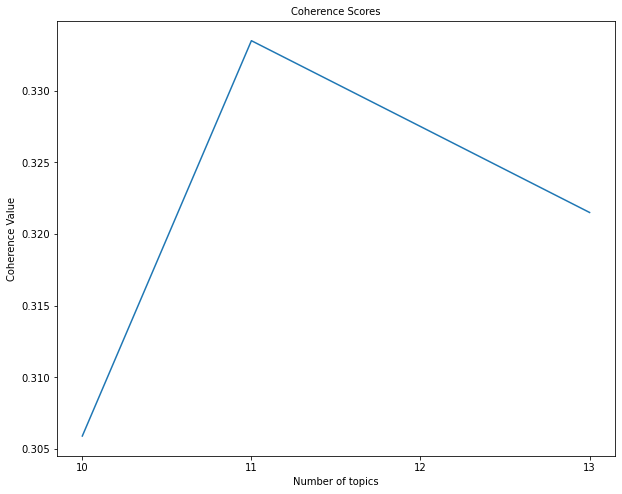

In [24]:
# get_ipython().run_line_magic('matplotlib', 'auto') # will give us the plots inline only

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);

In [25]:
##Latent Semantic Analysis / Latent Semantic Indexing

In [26]:
from gensim import corpora # Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string

In [27]:
import re

In [28]:
def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    x = re.sub(pattern, '', x)
    return x

In [29]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [30]:
def clean(x):
    x = clean_text(x)
    x = clean_numbers(x)
    return x

In [31]:
from pathlib import Path
from bs4 import BeautifulSoup

In [32]:
def load_articles(data_dir):
    reuters = Path(data_dir)
    for path in reuters.glob('*.sgm'):   # Standard Generalized Markup Language
        with path.open() as sgm_file:
            contents = sgm_file.read()
            soup = BeautifulSoup(contents)
            for article in soup.find_all('body'):
                yield article.text

In [33]:
def load_documents(document_dir):
    print(f'Loading from {document_dir}')
    documents = list(load_articles(document_dir))
    print(f'Loaded {len(documents)} documents')
    return documents

In [34]:
def prepare_documents(documents):
    print('Preparing documents')
    documents = [clean(document) for document in documents]
    documents = [preprocess_string(doc) for doc in documents]
    return documents

In [35]:
def create_lsa_model(documents, dictionary, number_of_topics):
    print(f'Creating LSA Model with {number_of_topics} topics')
    document_terms = [dictionary.doc2bow(doc) for doc in documents]
    return LsiModel(document_terms, num_topics=number_of_topics, id2word = dictionary)

In [36]:
def run_lsa_process(documents, number_of_topics=10):
    documents = prepare_documents(documents)
    dictionary = corpora.Dictionary(documents)
    lsa_model = create_lsa_model(documents, dictionary, number_of_topics)
    return documents, dictionary, lsa_model

In [37]:
articles = pd.read_csv('E:/360DigiZip/NLPTMAassgnmnt/NLP-TM.txt', delimiter='\t', header=None, names=["text"])

In [38]:
list_of_text = articles['text'].to_list()

In [39]:
documents, dictionary, model = run_lsa_process(list_of_text, number_of_topics=5)

Preparing documents
Creating LSA Model with 5 topics


In [40]:
model.print_topics()
model

In [41]:
# Coherence Model
from gensim.models.coherencemodel import CoherenceModel

In [42]:
def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [43]:
def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        documents, dictionary, model = run_lsa_process(articles, number_of_topics=num_topics)
        coherence = calculate_coherence_score(documents, dictionary, model)
        yield coherence

In [44]:
min_topics, max_topics = 5, 11

In [45]:
coherence_scores = list(get_coherence_values(min_topics, max_topics))
documents


Calculating coherence for 5 topics
Preparing documents
Creating LSA Model with 5 topics

Calculating coherence for 6 topics
Preparing documents
Creating LSA Model with 6 topics

Calculating coherence for 7 topics
Preparing documents
Creating LSA Model with 7 topics

Calculating coherence for 8 topics
Preparing documents
Creating LSA Model with 8 topics

Calculating coherence for 9 topics
Preparing documents
Creating LSA Model with 9 topics

Calculating coherence for 10 topics
Preparing documents
Creating LSA Model with 10 topics


[['articl',
  'cell',
  'nation',
  'institut',
  'healthfund',
  'research',
  'describ',
  'advanc',
  'genet',
  'engin',
  'techniqu',
  'transform',
  'bacteri',
  'protein',
  'new',
  'research',
  'tool',
  'help',
  'monitor',
  'serotonin',
  'transmiss',
  'greater',
  'fidel',
  'current',
  'methodspreclin',
  'experi',
  'primarili',
  'mice',
  'show',
  'sensor',
  'detect',
  'subtl',
  'realtim',
  'chang',
  'brain',
  'serotonin',
  'level',
  'sleep',
  'fear',
  'social',
  'interact',
  'test',
  'effect',
  'new',
  'psychoact',
  'drugsth',
  'studi',
  'fund',
  'nih',
  'brain',
  'research',
  'advanc',
  'innov',
  'neurotechnolog',
  'brain',
  'initi',
  'aim',
  'revolution',
  'understand',
  'brain',
  'healthi',
  'diseas',
  'conditionsth',
  'studi',
  'led',
  'research',
  'lab',
  'lin',
  'tian',
  'phd',
  'princip',
  'investig',
  'univers',
  'california',
  'davi',
  'school',
  'medicin',
  'current',
  'method',
  'detect',
  'broad',
  '

In [46]:
## Plot
import matplotlib.pyplot as plt

In [47]:
# get_ipython().run_line_magic('matplotlib', 'inline')
x = [int(i) for i in range(min_topics, max_topics)]

Text(0.5, 1.0, 'Coherence Scores by number of Topics')

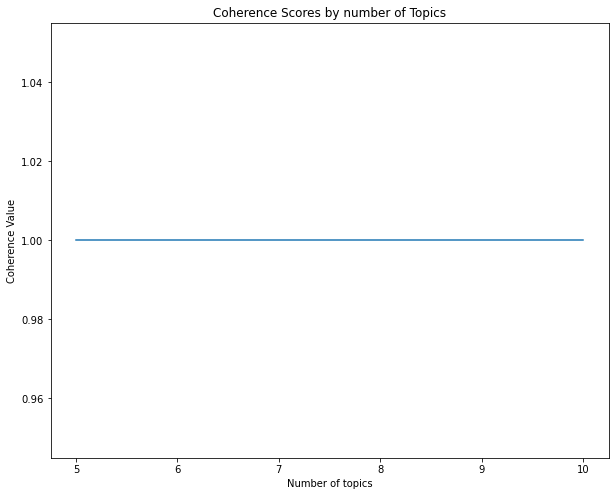

In [48]:
plt.figure(figsize=(10,8))
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores by number of Topics')

In [49]:
#### Text Summarization ###

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest

In [52]:
STOPWORDS = set(stopwords.words('english') + list(punctuation))
MIN_WORD_PROP, MAX_WORD_PROP = 0.1, 0.9

In [53]:
def compute_word_frequencies(word_sentences):
    words = [word for sentence in word_sentences 
                     for word in sentence 
                         if word not in STOPWORDS]
    counter = Counter(words)
    limit = float(max(counter.values()))
    word_frequencies = {word: freq/limit 
                                for word,freq in counter.items()}
    # Drop words if too common or too uncommon
    word_frequencies = {word: freq 
                            for word,freq in word_frequencies.items() 
                                if freq > MIN_WORD_PROP 
                                and freq < MAX_WORD_PROP}
    return word_frequencies

In [54]:
def sentence_score(word_sentence, word_frequencies):
    return sum([ word_frequencies.get(word,0) 
                    for word in word_sentence])

In [55]:
def summarize(text:str, num_sentences=3):
    """
    Summarize the text, by return the most relevant sentences
     :text the text to summarize
     :num_sentences the number of sentences to return
    """
    text = text.lower() # Make the text lowercase
    
    sentences = sent_tokenize(text) # Break text into sentences 
    
    # Break sentences into words
    word_sentences = [word_tokenize(sentence) for sentence in sentences]
    
    # Compute the word frequencies
    word_frequencies = compute_word_frequencies(word_sentences)
    
    # Calculate the scores for each of the sentences
    scores = [sentence_score(word_sentence, word_frequencies) for word_sentence in word_sentences]
    sentence_scores = list(zip(sentences, scores))
    
    # Rank the sentences
    top_sentence_scores = nlargest(num_sentences, sentence_scores, key=lambda t: t[1])
    
    # Return the top sentences
    return [t[0] for t in top_sentence_scores]

In [56]:
articles= pd.read_csv('E:/360DigiZip/NLPTMAassgnmnt/NLP-TM.txt', delimiter='\t', header=None, names=["text"])

In [57]:
list_of_text = articles['text'].to_list()

In [58]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [59]:
list_of_text= (listToString(list_of_text))

In [60]:
len(sent_tokenize(list_of_text))

1337

In [61]:
summarize(list_of_text)

['this approach will facilitate substantive adoption of technology and fundamental principles promoted by the brain initiative® into the broader nih neuroscience funding portfolio.nih should consider leveraging the all of us research program to recruit participants for human neuroscience research sponsored by the nih brain initiative.while the preceding sections include many important findings for future implementation of the nih brain initiative, none represent a notable departure from the vision presented by brain 2025. however, one domain where we believe the nih brain initiative could flourish in its second phase is through encouraging development of several large-scale projects that will yield particularly important resources and data to propel neuroscience far into the future.the brain initiative® cell census network (biccn), which was described in priority area 1: discovering diversity, stands as a model for such projects.',
 'example technologies might include crispr-based meth

In [62]:
summarize(list_of_text, num_sentences=1)

['this approach will facilitate substantive adoption of technology and fundamental principles promoted by the brain initiative® into the broader nih neuroscience funding portfolio.nih should consider leveraging the all of us research program to recruit participants for human neuroscience research sponsored by the nih brain initiative.while the preceding sections include many important findings for future implementation of the nih brain initiative, none represent a notable departure from the vision presented by brain 2025. however, one domain where we believe the nih brain initiative could flourish in its second phase is through encouraging development of several large-scale projects that will yield particularly important resources and data to propel neuroscience far into the future.the brain initiative® cell census network (biccn), which was described in priority area 1: discovering diversity, stands as a model for such projects.']